## give one student data to check placement done or not

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [4]:
df = pd.read_csv('college_student_placement_dataset.CSV')
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


# step 1
### Preprocess , EDA , Feature Selection

In [5]:
X = df.iloc[: ,[1,3,9]]
X.head(2)

,IQ,CGPA,Placement
0,107,6.28,0
1,97,5.37,0


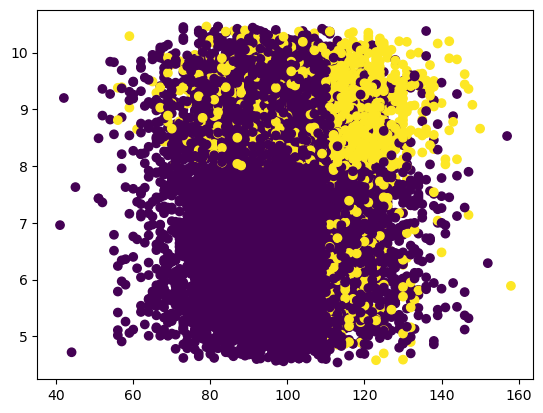

In [6]:
plt.scatter(X['IQ'],X['CGPA'], c=X['Placement'])

# step 2
### Extract input and output columns 

In [7]:
Y=X.iloc[ : ,-1]
X=X.iloc[ :,0:2]
X.head()

,IQ,CGPA
0,107,6.28
1,97,5.37
2,109,5.83
3,122,5.75
4,96,7.69


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IQ      10000 non-null  int64  
 1   CGPA    10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [9]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Placement, dtype: int64

In [10]:

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IQ      10000 non-null  int64  
 1   CGPA    10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


# step 4
### Train test split 

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [12]:
X_train.head()

,IQ,CGPA
9249,74,9.53
7329,92,6.04
2805,73,5.17
3626,87,6.35
8594,98,9.85


In [13]:
Y_train.head()

9249    0
7329    0
2805    0
3626    0
8594    0
Name: Placement, dtype: int64

In [14]:
X_test.head()

,IQ,CGPA
1461,81,6.89
4993,108,7.44
6172,94,9.49
6921,90,9.24
3448,94,9.31


In [15]:
Y_test.head()

1461    0
4993    0
6172    0
6921    0
3448    1
Name: Placement, dtype: int64

# step 3 
### Scaler the values 

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.69185857,  1.35752807],
       [-0.4981672 , -1.01499893],
       [-1.75817476, -1.60643116],
       ...,
       [-1.16132907,  1.74501816],
       [-1.95712332,  0.14067325],
       [ 0.49657561,  0.97003799]])

In [17]:
X_test=scaler.fit_transform(X_test)
X_test

array([[-1.22340878, -0.4352605 ],
       [ 0.60055793, -0.05895656],
       [-0.34520259,  1.34363084],
       ...,
       [-1.29096311, -0.81156444],
       [-1.69628904, -0.7020942 ],
       [-1.15585446,  1.34363084]])

# step 5
### Train the model

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# model train code
clf.fit(X_train,Y_train)


LogisticRegression()

## check the model accuracy

In [21]:
y_pred =clf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.867

In [26]:
!pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable


In [27]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

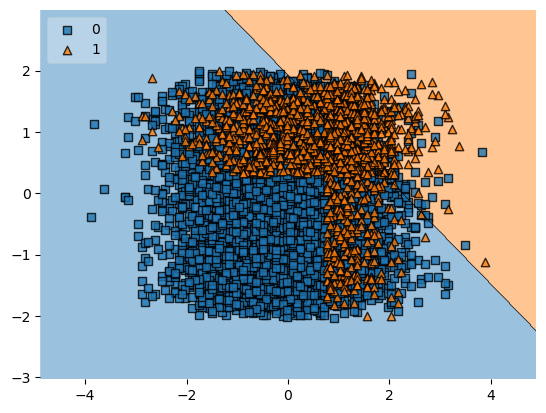

In [28]:
plot_decision_regions(X_train,Y_train.values, clf=clf , legend=2)